In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
! cd drive/MyDrive/Myntra_fashion_recommendation/Dataset/In-shop-Clothes-Retrieval-Benchmark/Anno && ls

attributes		      list_item_inshop.txt
list_bbox_inshop.txt	      list_landmarks_inshop.txt
list_description_inshop.json  original_list_bbox_inshop.txt


# Fashion landmark dataset for Pose estimation

In [3]:
df = pd.read_csv('drive/MyDrive/Myntra_fashion_recommendation/Dataset/Fashion-Landmark-Detection-Benchmark/Anno/list_joints.txt',
                 skiprows=0,sep=" ",header=1)
df.head()

,image_name,clothes_type,variation_type,joint_visibility_1,joint_location_x_1,joint_location_y_1,joint_visibility_2,joint_location_x_2,joint_location_y_2,joint_visibility_3,joint_location_x_3,joint_location_y_3,joint_visibility_4,joint_location_x_4,joint_location_y_4,joint_visibility_5,joint_location_x_5,joint_location_y_5,joint_visibility_6,joint_location_x_6,joint_location_y_6,joint_visibility_7,joint_location_x_7,joint_location_y_7,joint_visibility_8,joint_location_x_8,joint_location_y_8,joint_visibility_9,joint_location_x_9,joint_location_y_9,joint_visibility_10,joint_location_x_10,joint_location_y_10,joint_visibility_11,joint_location_x_11,joint_location_y_11,joint_visibility_12,joint_location_x_12,joint_location_y_12,joint_visibility_13,joint_location_x_13,joint_location_y_13,joint_visibility_14,joint_location_x_14,joint_location_y_14
0,img/img_00000001.jpg,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,img/img_00000002.jpg,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,img/img_00000003.jpg,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img/img_00000004.jpg,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img/img_00000005.jpg,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


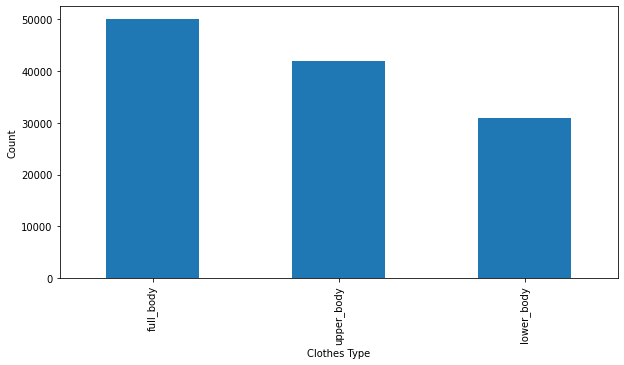

In [5]:
# map clothes type using Readme file of the dataset
df.clothes_type.replace({1:'upper_body',2:'lower_body',3:'full_body'}).value_counts().plot(kind='bar',
                                                                                           xlabel='Clothes Type',ylabel='Count',
                                                                                           figsize=(10,5));

In [19]:
# check how many full shot images have joint annotations
len(df[(df.clothes_type==3) & ~(np.isnan(df.joint_visibility_1))])

39951

### Summary:-
* Full body images are highest with the count of 50k but only around 40k images have the joint annotations.
* Upper and Lower body images are 42k and 31k respectively.

# In-shop dataset for Article detection and localisation

In [24]:
# preprocessing text file
import time
start = time.time()
fin = open('drive/MyDrive/Myntra_fashion_recommendation/Dataset/In-shop-Clothes-Retrieval-Benchmark/Anno/original_list_bbox_inshop.txt',
           "rt")
fout = open('drive/MyDrive/Myntra_fashion_recommendation/Dataset/In-shop-Clothes-Retrieval-Benchmark/Anno/list_bbox_inshop.txt',
            "wt")

# converting more than one space to single space
for line in fin:
    fout.write(' '.join(line.split()))
    fout.write('\n')

fin.close()
fout.close()
print(time.time()-start)

1.0435245037078857


In [6]:
df2 = pd.read_csv('drive/MyDrive/Myntra_fashion_recommendation/Dataset/In-shop-Clothes-Retrieval-Benchmark/Anno/list_bbox_inshop.txt',
                 skiprows=0,sep=" ",header=1)
df2.tail()

,image_name,clothes_type,pose_type,x_1,y_1,x_2,y_2
52707,img/WOMEN/Jackets_Coats/id_00007982/12_7_addit...,1,5,100,38,153,143
52708,img/WOMEN/Jackets_Coats/id_00007982/13_1_front...,1,1,50,29,236,249
52709,img/WOMEN/Jackets_Coats/id_00007982/13_2_side.jpg,1,2,55,29,185,242
52710,img/WOMEN/Jackets_Coats/id_00007982/13_3_back.jpg,1,3,86,46,184,245
52711,img/WOMEN/Jackets_Coats/id_00007982/13_7_addit...,1,5,94,42,132,143


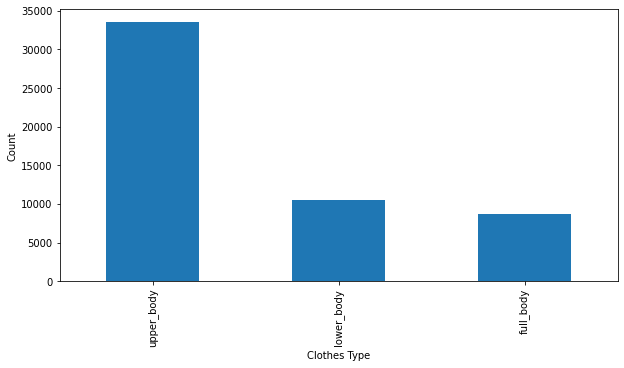

In [8]:
# map clothes type using Readme file of the dataset
df2.clothes_type.replace({1:'upper_body',2:'lower_body',3:'full_body'}).value_counts().plot(kind='bar',
                                                                                            xlabel='Clothes Type',ylabel='Count',
                                                                                            figsize=(10,5));

### Summary:-
* Uper body images are highest with the count of 33k.
* Full and Lower body images are 9k and 10k respectively.

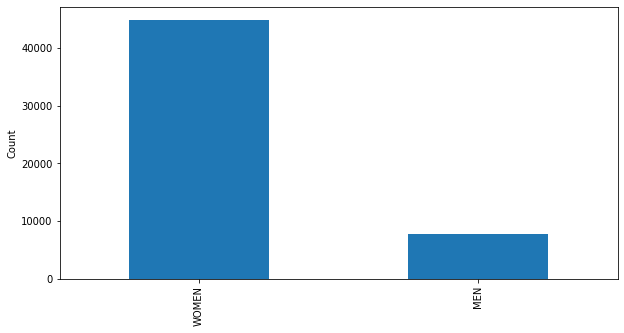

In [9]:
df2_copy = df2.copy()
# get gender of clothing from image_name
df2_copy.image_name = df2.image_name.apply(lambda x: x.split('/')[1])
df2_copy.image_name.value_counts().plot(kind='bar', ylabel='Count', figsize=(10,5));

### Summary:-
* Women clothes(around 45k) are way more compare to Men(around 8k).

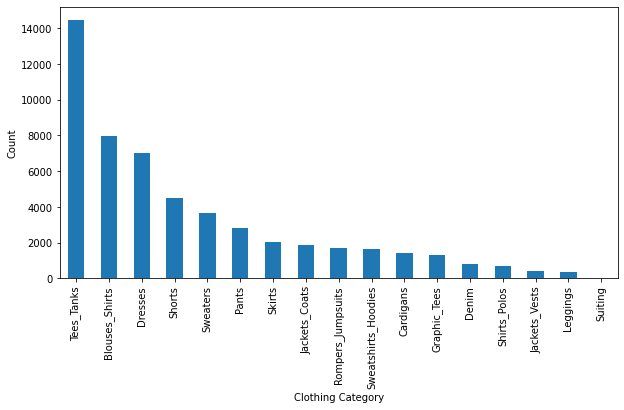

In [10]:
df2_copy = df2.copy()
# get categories of clothing from image_name
df2_copy.image_name = df2.image_name.apply(lambda x: x.split('/')[2])
df2_copy.image_name.value_counts().plot(kind='bar',xlabel='Clothing Category', ylabel='Count', figsize=(10,5));

### Summary:-
* Tees tanks is the category having largest count (around 14k).
* There are only 39 images of Suits category.